In [1]:
import pandas as pd
import glob
import re
from functools import reduce

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from collections import Counter

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [2]:
import nltk

In [3]:
all_files = glob.glob('./data/my*.xls')
all_files

['./data/myCabinetExcelData (4).xls',
 './data/myCabinetExcelData (2).xls',
 './data/myCabinetExcelData (3).xls',
 './data/myCabinetExcelData (1).xls',
 './data/myCabinetExcelData.xls']

In [4]:
all_files_data = []
for file in all_files:
    data_frame = pd.read_excel(file)
    #print(data_frame)
    all_files_data.append(data_frame)
print(all_files_data)

[    Unnamed: 0  번호                                                 제목  \
0          NaN   1  MBTI&reg; Personality Preferences and Diverse ...   
1          NaN   2  MBTI&reg; and Interlibrary Loan Personnel in a...   
2          NaN   3  Negative: The MBTI: Not Ready for Routine Use ...   
3          NaN   4  TDI versus MBTI&reg;: A further reply to Roy C...   
4          NaN   5  TDI versus MBTI&reg;: Roy Childs replies to Ro...   
5          NaN   6    Applying the MBTI&reg; to Hospitality Education   
6          NaN   7           Coaching with 360 and MBTI: A case study   
7          NaN   8  Exploring the conceptual relationship between ...   
8          NaN   9                           MBTI and Historical Data   
9          NaN  10  MBTI Personality Types and Academic Achievemen...   
10         NaN  11  MBTI personality type and other factors that r...   
11         NaN  12  MBTI Personality Types of Project Managers and...   
12         NaN  13  Using MBTI type to explore dif

In [5]:
all_files_data_concat = pd.concat(all_files_data,axis=0,ignore_index=True)
all_files_data_concat

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,MBTI&reg; Personality Preferences and Diverse ...,"Russell, A. L.",INTERNATIONAL ASSOCIATION OF SCHOOL LIBRARIANSHIP,2002
1,NaN,2,MBTI&reg; and Interlibrary Loan Personnel in a...,"Wright, A. J.","HAWORTH PRESS, INC.",2002
2,NaN,3,Negative: The MBTI: Not Ready for Routine Use ...,"Healy, Charles C.",American Association for Counseling and Develo...,1989
3,NaN,4,TDI versus MBTI&reg;: A further reply to Roy C...,"Bayne, R.",BRITISH PSYCHOLOGICAL SOCIETY,2005
4,NaN,5,TDI versus MBTI&reg;: Roy Childs replies to Ro...,"Childs, R.",BRITISH PSYCHOLOGICAL SOCIETY,2005
...,...,...,...,...,...,...
452,NaN,96,"Tyttenhanger house, Herts / Interior Design : ...","Spence, Sir Basil",unknown,1974
453,NaN,97,"Flat, Kensington / Interior designer : Susanne...","Garry, Susanne",unknown,1975
454,NaN,98,Interior design international review,unknown,unknown,1983
455,NaN,99,"Debenham's health club, London / Interior desi...",unknown,unknown,1975


In [6]:
all_title = all_files_data_concat['제목']
all_title

0      MBTI&reg; Personality Preferences and Diverse ...
1      MBTI&reg; and Interlibrary Loan Personnel in a...
2      Negative: The MBTI: Not Ready for Routine Use ...
3      TDI versus MBTI&reg;: A further reply to Roy C...
4      TDI versus MBTI&reg;: Roy Childs replies to Ro...
                             ...                        
452    Tyttenhanger house, Herts / Interior Design : ...
453    Flat, Kensington / Interior designer : Susanne...
454                 Interior design international review
455    Debenham's health club, London / Interior desi...
456    Interior Design Identity in the Crossfire: A C...
Name: 제목, Length: 457, dtype: object

In [7]:
# 영어 거르기
stopwords = set(stopwords.words('english'))

# 단어 추출
lemma = WordNetLemmatizer()

In [8]:
words = []
for title in all_title:
    EnWords = re.sub(r'[^a-zA-Z]+',' ',str(title))
    EnWordsToken = word_tokenize(EnWords.lower())
    EnWordsTokenStop = [w for w in EnWordsToken if w not in stopwords]
    EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop]
    words.append(EnWordsTokenStopLemma)

In [9]:
# word가 2차원 배열이므로 1차원으로 만들어주는 작업
# reduce 반복작업해주는 함수
words2 = reduce(lambda x,y:x+y,words)
print(words2[:10])

['mbti', 'reg', 'personality', 'preference', 'diverse', 'online', 'learning', 'experience', 'mbti', 'reg']


In [10]:
count = Counter(words2)
count

Counter({'mbti': 57,
         'reg': 5,
         'personality': 10,
         'preference': 10,
         'diverse': 1,
         'online': 3,
         'learning': 12,
         'experience': 15,
         'interlibrary': 1,
         'loan': 1,
         'personnel': 1,
         'small': 2,
         'sampling': 1,
         'alabama': 1,
         'academic': 5,
         'library': 2,
         'negative': 1,
         'ready': 3,
         'routine': 1,
         'use': 5,
         'counseling': 1,
         'tdi': 3,
         'versus': 5,
         'reply': 3,
         'roy': 3,
         'child': 4,
         'rowan': 1,
         'bayne': 1,
         'applying': 2,
         'hospitality': 1,
         'education': 22,
         'coaching': 1,
         'case': 5,
         'study': 17,
         'exploring': 14,
         'conceptual': 2,
         'relationship': 7,
         'emotional': 2,
         'intelligence': 3,
         'extraversion': 1,
         'introversion': 1,
         'dimension': 3,
      

In [11]:
count.most_common(10)

[('interior', 411),
 ('design', 176),
 ('designer', 71),
 ('mbti', 57),
 ('student', 25),
 ('london', 23),
 ('space', 23),
 ('education', 22),
 ('type', 21),
 ('new', 19)]

In [12]:
word_count = dict()
for tag, counts in count.most_common(50):
    if len(str(tag))>1:
        word_count[tag] = counts
print(word_count)

{'interior': 411, 'design': 176, 'designer': 71, 'mbti': 57, 'student': 25, 'london': 23, 'space': 23, 'education': 22, 'type': 21, 'new': 19, 'study': 17, 'office': 16, 'international': 16, 'experience': 15, 'exploring': 14, 'implication': 14, 'structure': 14, 'project': 13, 'modern': 13, 'home': 13, 'learning': 12, 'environment': 12, 'history': 12, 'house': 12, 'hotel': 11, 'personality': 10, 'preference': 10, 'practice': 10, 'effect': 10, 'using': 9, 'style': 9, 'social': 9, 'process': 9, 'practitioner': 9, 'research': 9, 'architecture': 9, 'myers': 8, 'briggs': 8, 'indicator': 8, 'development': 8, 'creative': 8, 'service': 8, 'contemporary': 8, 'earth': 8, 'symposium': 8, 'associate': 8, 'technology': 8, 'art': 8, 'award': 8}


In [13]:
# 딕셔너리는 x축으로 사용불가해서 리스트로 변환
key_list = list(word_count.keys())
key_list[:10]

['interior',
 'design',
 'designer',
 'mbti',
 'student',
 'london',
 'space',
 'education',
 'type',
 'new']

In [14]:
sorted_keys_list = sorted(key_list)
sorted_keys_list[:10]

['architecture',
 'art',
 'associate',
 'award',
 'briggs',
 'contemporary',
 'creative',
 'design',
 'designer',
 'development']

In [15]:
values = list(word_count.values())
values[:5]

[411, 176, 71, 57, 25]

In [16]:
sorted_values = sorted(word_count.values(), reverse=True)
sorted_values[:10]

[411, 176, 71, 57, 25, 23, 23, 22, 21, 19]

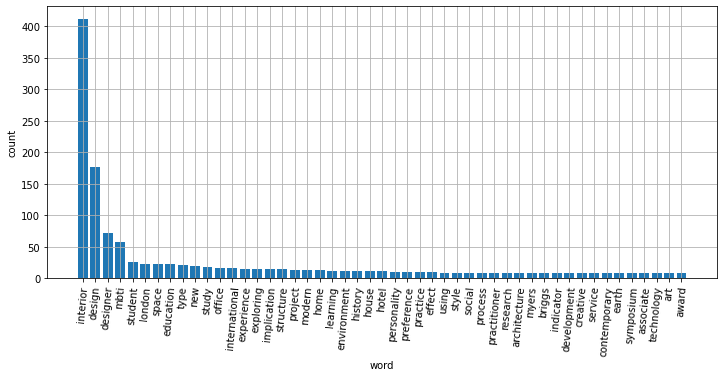

In [17]:
# 히스토그램 표시 옵션
plt.figure(figsize=(12,5))
plt.xlabel('word')
plt.ylabel('count')
# 격자무늬
plt.grid(True)

plt.bar(range(len(word_count)),values)
plt.xticks(range(len(word_count)),key_list,rotation='85')
plt.show()